## Key Points : 
- This is a dataset consisting of features for tracks fetched using Spotify's Web API. <br>
- The tracks are labeled '1' or '0' ('Hit' or 'Flop') depending on some criteria of the author. <br>
- <b>This dataset can be used to make a classification model that predicts whether a track would be a 'Hit' or not. </b><br>
- (Note: The author does not objectively considers a track inferior, bad or a failure if its labeled 'Flop'. 'Flop' here merely implies that it is a track that probably could not be considered popular in the mainstream.)

Attributes:
- <b>track:</b> The Name of the track.
- <b>artist:</b> The Name of the Artist.
- <b>uri:</b> The resource identifier for the track.
- <b>danceability:</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
- <b>energy:</b> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
- <b>key:</b> The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.
- <b>loudness:</b> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
- <b>mode:</b> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- <b>speechiness:</b> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- <b>acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
- <b>instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
- <b>liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- <b>valence:</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- <b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- <b>duration_ms:</b> 	The duration of the track in milliseconds.
- <b>time_signature:</b> An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- <b>chorus_hit:</b> This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track (in milliseconds). This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.
- <b>sections:</b> The number of sections the particular track has. This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.
- <b>target:</b>The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.
- The author's condition of a track being 'flop' is as follows:
  - The track must not appear in the 'hit' list of that decade.
  - The track's artist must not appear in the 'hit' list of that decade.
  - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
  - The track's genre must not have a song in the 'hit' list.
  - The genre list for the particular decades are as follows:
  - The track must have 'US' as one of its markets.

## 1. Exploratory Data Analysis

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_00s = pd.read_csv("dataset-of-00s.csv")
df_00s.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [3]:
df_10s = pd.read_csv("dataset-of-10s.csv")
df_10s.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [4]:
df_60s = pd.read_csv("dataset-of-60s.csv")
df_60s.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [5]:
df_70s = pd.read_csv("dataset-of-70s.csv")
df_70s.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


In [6]:
df_80s = pd.read_csv("dataset-of-80s.csv")
df_80s.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


In [7]:
df_90s = pd.read_csv("dataset-of-90s.csv")
df_90s.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [9]:
print("df_00s: ",df_00s.shape)
print("df_10s: ",df_10s.shape)
print("df_60s: ",df_60s.shape)
print("df_70s: ",df_70s.shape)
print("df_80s: ",df_80s.shape)
print("df_90s: ",df_90s.shape)

df_00s:  (5872, 19)
df_10s:  (6398, 19)
df_60s:  (8642, 19)
df_70s:  (7766, 19)
df_80s:  (6908, 19)
df_90s:  (5520, 19)


In [27]:
#Lets check all the dataset columns is same or not
a = df_00s.columns == df_10s.columns
b = df_60s.columns == df_70s.columns
c = df_80s.columns == df_90s.columns
(a==b)==c
#All the columns in 6 dataset is same 
#We can merge them into a single dataset easily

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [28]:
#Lets see what are the column names are,
df_00s.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [33]:
#Lets confirm all the datatypes or same or not before merging
a = df_00s.dtypes
b = df_10s.dtypes
c = df_60s.dtypes
d = df_70s.dtypes
e = df_80s.dtypes
f = df_90s.dtypes
(((a==b)==c)) == (((d==e)==f))
#All the datatypes of all the six datasets are same

track               True
artist              True
uri                 True
danceability        True
energy              True
key                 True
loudness            True
mode                True
speechiness         True
acousticness        True
instrumentalness    True
liveness            True
valence             True
tempo               True
duration_ms         True
time_signature      True
chorus_hit          True
sections            True
target              True
dtype: bool

In [34]:
#Lets see what are those datatypes,
df_00s.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

<b>Now we understood that we can merge the columns,after checking each columns and datatypes of all the dataset, <br>
But if we merge all the datasets into a single dataset, we may loose the information 'Year in which song got released' <br>
Lets tackle that problem</b>

In [8]:
#Creating a new column year in all the datasets
df_00s['year'] = pd.Series(dtype='object')
df_10s['year'] = pd.Series(dtype='object')
df_60s['year'] = pd.Series(dtype='object')
df_70s['year'] = pd.Series(dtype='object')
df_80s['year'] = pd.Series(dtype='object')
df_90s['year'] = pd.Series(dtype='object')

In [9]:
#Lets fill all the NAN of 'year'
df_00s['year'].fillna('2000-2009', inplace=True)
df_10s['year'].fillna('2010-2019', inplace=True)
df_60s['year'].fillna('1960-1969', inplace=True)
df_70s['year'].fillna('1970-1979', inplace=True)
df_80s['year'].fillna('1980-1989', inplace=True)
df_90s['year'].fillna('1990-1999', inplace=True)

In [10]:
df_00s.head(2)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.3680,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,2000-2009
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.0185,0.0,0.148,0.688,92.988,242587,4,41.51106,10,1,2000-2009


In [11]:
# As the data is taken directly from the API, there is no duplicates in all the 6 datasets
duplicates = df_90s.duplicated()
df_90s[duplicates].sum()

track               0.0
artist              0.0
uri                 0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
chorus_hit          0.0
sections            0.0
target              0.0
year                0.0
dtype: float64

<b> we did our basic analysis before merging, Lets Merge all the Dataset into one </b>

In [11]:
df_00s['year'].fillna('2000-2009', inplace=True)
df_10s['year'].fillna('2010-2019', inplace=True)
df_60s['year'].fillna('1960-1969', inplace=True)
df_70s['year'].fillna('1970-1979', inplace=True)
df_80s['year'].fillna('1980-1989', inplace=True)
df_90s['year'].fillna('1990-1999', inplace=True)

In [12]:
#Lets not use the index values = 'True' so that we dont miss the count.
spotify = pd.concat([df_10s, df_00s, df_90s, df_80s, df_70s, df_60s], ignore_index=True, sort=False)

In [13]:
spotify.head() #(41106, 20)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1,2010-2019
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0,2010-2019
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1,2010-2019
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0,2010-2019
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1,2010-2019


In [106]:
spotify.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
41101,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,0.879000,0.363,0.183,119.821,26244,4,0.00000,2,0,1960-1969
41102,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,0.000000,0.107,0.834,135.104,142987,4,28.34316,10,0,1960-1969
41103,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,0.000178,0.115,0.139,92.472,137200,4,56.63498,6,0,1960-1969
41104,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,0.000000,0.738,0.853,137.976,159107,3,28.24372,9,0,1960-1969
41105,Mambo Simphony - Remasterizado,Orquesta Casino De La Playa,spotify:track:5j0G0nkCSPlmSCSgXchMn3,0.554,0.2780,5,-8.386,1,0.0349,0.928,0.922000,0.136,0.428,131.401,164227,4,37.39251,8,0,1960-1969


In [107]:
spotify.shape

(41106, 20)

In [14]:
#Lets bring the last column to front
cols = list(spotify.columns)
cols = [cols[-1]] + cols[:-1]
spotify = spotify[cols]

In [15]:
spotify.head(5)

,year,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,2010-2019,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,2010-2019,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,2010-2019,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,2010-2019,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,2010-2019,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [16]:
spotify.tail(5)

,year,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
41101,1960-1969,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,0.879000,0.363,0.183,119.821,26244,4,0.00000,2,0
41102,1960-1969,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,0.000000,0.107,0.834,135.104,142987,4,28.34316,10,0
41103,1960-1969,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,0.000178,0.115,0.139,92.472,137200,4,56.63498,6,0
41104,1960-1969,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,0.000000,0.738,0.853,137.976,159107,3,28.24372,9,0
41105,1960-1969,Mambo Simphony - Remasterizado,Orquesta Casino De La Playa,spotify:track:5j0G0nkCSPlmSCSgXchMn3,0.554,0.2780,5,-8.386,1,0.0349,0.928,0.922000,0.136,0.428,131.401,164227,4,37.39251,8,0


In [20]:
spotify.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599793,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


### 1.1 Lets understand data by visualizations

In [21]:
spotify['target'].value_counts()

1    20553
0    20553
Name: target, dtype: int64

In [26]:
spotify.groupby('target')['target'].count()

target
0    20553
1    20553
Name: target, dtype: int64

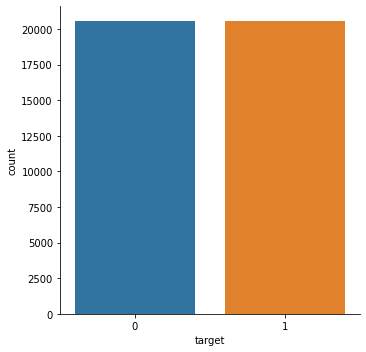

In [29]:
#Data contains same number of hit and flop records
sns.factorplot('target',data=spotify,kind="count")

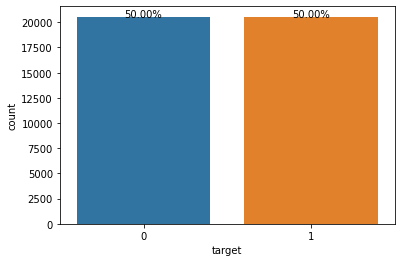

In [30]:
#Lets Visualize the Online and Offline orders
target_records = spotify['target']
ax = sns.countplot(target_records)
total = len(target_records)
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x()+x.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha = 'center')  
# 1 for HIT  AND  0 for FLOP

<b>Lets visualize the probability distribution of samples against multiple continuous attributes: </b>

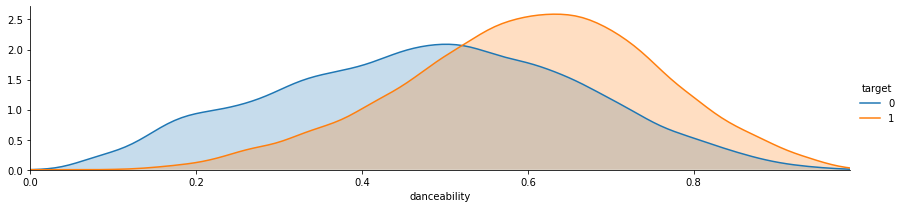

In [46]:
#Daceability with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'danceability',shade=True)
oldest = spotify['danceability'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

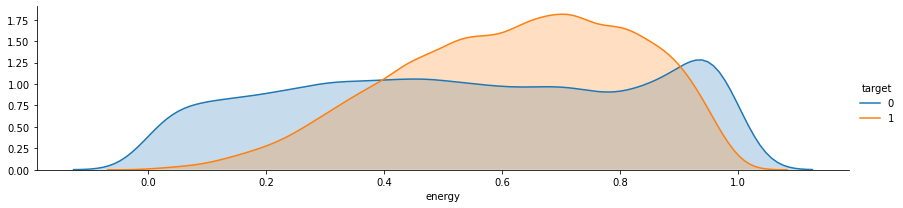

In [58]:
#energy with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'energy',shade=True)
oldest = spotify['energy'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

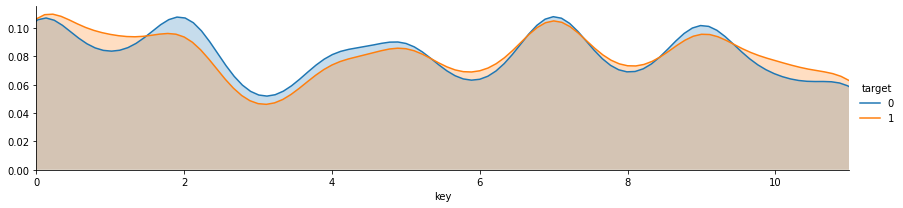

In [59]:
#key with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'key',shade=True)
oldest = spotify['key'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

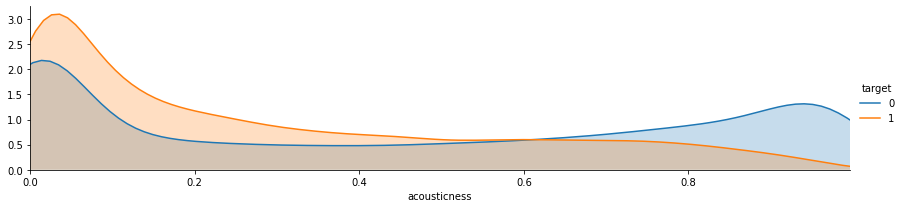

In [69]:
#acousticness with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'acousticness',shade=True)
oldest = spotify['acousticness'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

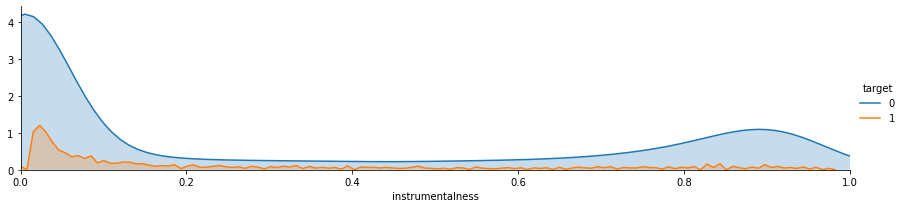

In [70]:
#instrumentalness with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'instrumentalness',shade=True)
oldest = spotify['instrumentalness'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

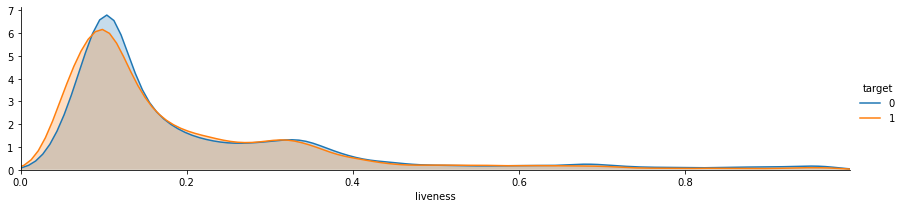

In [71]:
#liveness with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'liveness',shade=True)
oldest = spotify['liveness'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

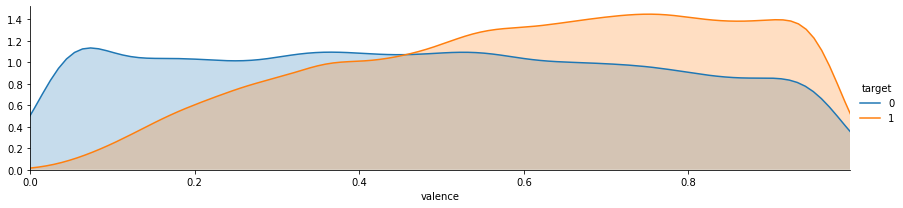

In [72]:
#valence with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'valence',shade=True)
oldest = spotify['valence'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

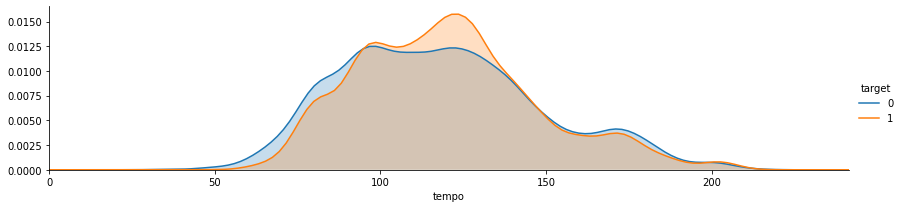

In [73]:
#tempo with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'tempo',shade=True)
oldest = spotify['tempo'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

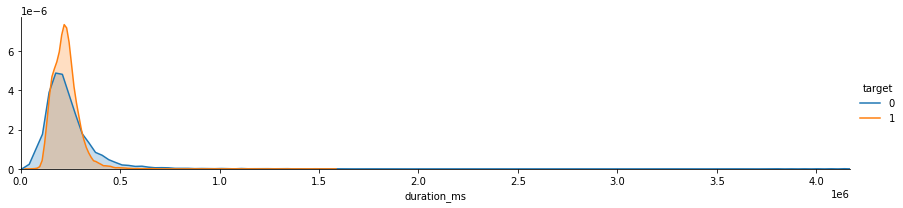

In [74]:
#duration with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'duration_ms',shade=True)
oldest = spotify['duration_ms'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

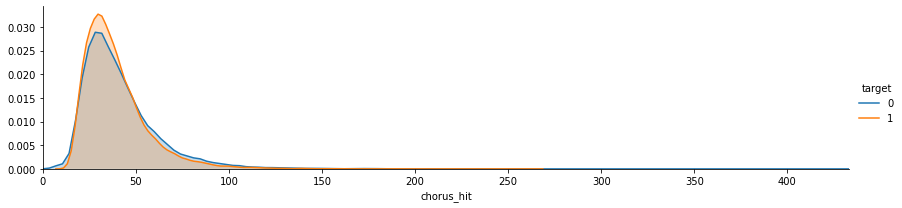

In [76]:
#chorus_hit with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'chorus_hit',shade=True)
oldest = spotify['chorus_hit'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

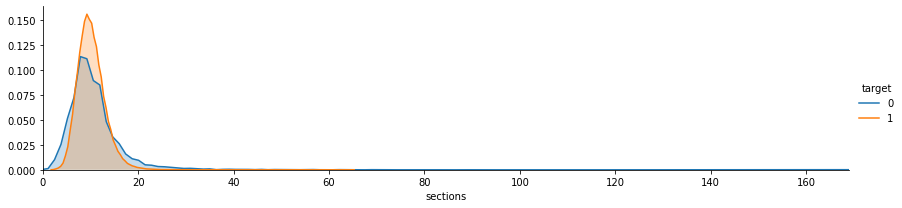

In [79]:
#Sections with respect to hit or flop
fig = sns.FacetGrid(spotify,hue='target',aspect=4)
fig.map(sns.kdeplot,'sections',shade=True)
oldest = spotify['sections'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<b> Lets visualize by using histogram on different attributes: </b>

In [86]:
#custom palette
red_blue = ["#19b5fe","#ef4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [100]:
pos_tempo = spotify[spotify['target'] == 1]['tempo']
neg_tempo = spotify[spotify['target'] == 0]['tempo']

pos_dance = spotify[spotify['target'] == 1]['danceability']
neg_dance = spotify[spotify['target'] == 0]['danceability']

pos_duration = spotify[spotify['target'] == 1]['duration_ms']
neg_duration = spotify[spotify['target'] == 0]['duration_ms']

pos_loudness = spotify[spotify['target'] == 1]['loudness']
neg_loudness = spotify[spotify['target'] == 0]['loudness']

pos_speechiness = spotify[spotify['target'] == 1]['speechiness']
neg_speechiness = spotify[spotify['target'] == 0]['speechiness']

pos_valence = spotify[spotify['target'] == 1]['valence']
neg_valence = spotify[spotify['target'] == 0]['valence']

pos_energy = spotify[spotify['target'] == 1]['energy']
neg_energy = spotify[spotify['target'] == 0]['energy']

pos_acousticness = spotify[spotify['target'] == 1]['acousticness']
neg_acousticness = spotify[spotify['target'] == 0]['acousticness']

pos_key = spotify[spotify['target'] == 1]['key']
neg_key = spotify[spotify['target'] == 0]['key']

pos_instrumentalness = spotify[spotify['target'] == 1]['instrumentalness']
neg_instrumentalness = spotify[spotify['target'] == 0]['instrumentalness']


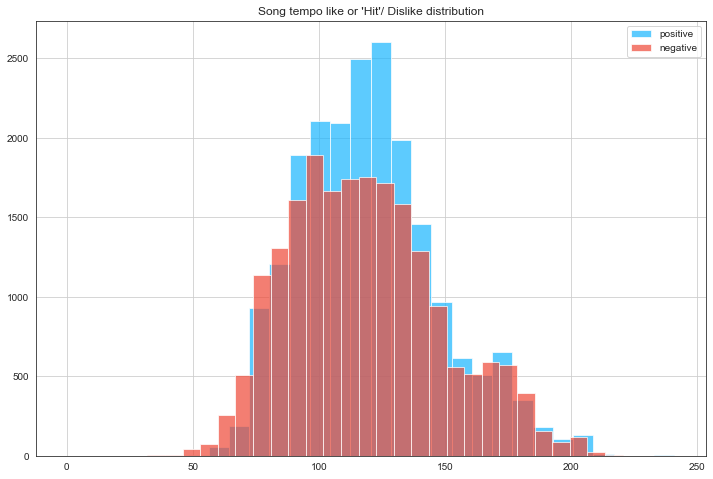

In [101]:
# Tempo's Hits or Flops (Likes or Dis-likes)
fig = plt.figure(figsize=(12,8))
plt.title("Song tempo like or 'Hit'/ Dislike distribution")
pos_tempo.hist(alpha=0.7,bins=30,label='positive')
neg_tempo.hist(alpha=0.7,bins=30,label='negative')
plt.legend(loc="upper right")

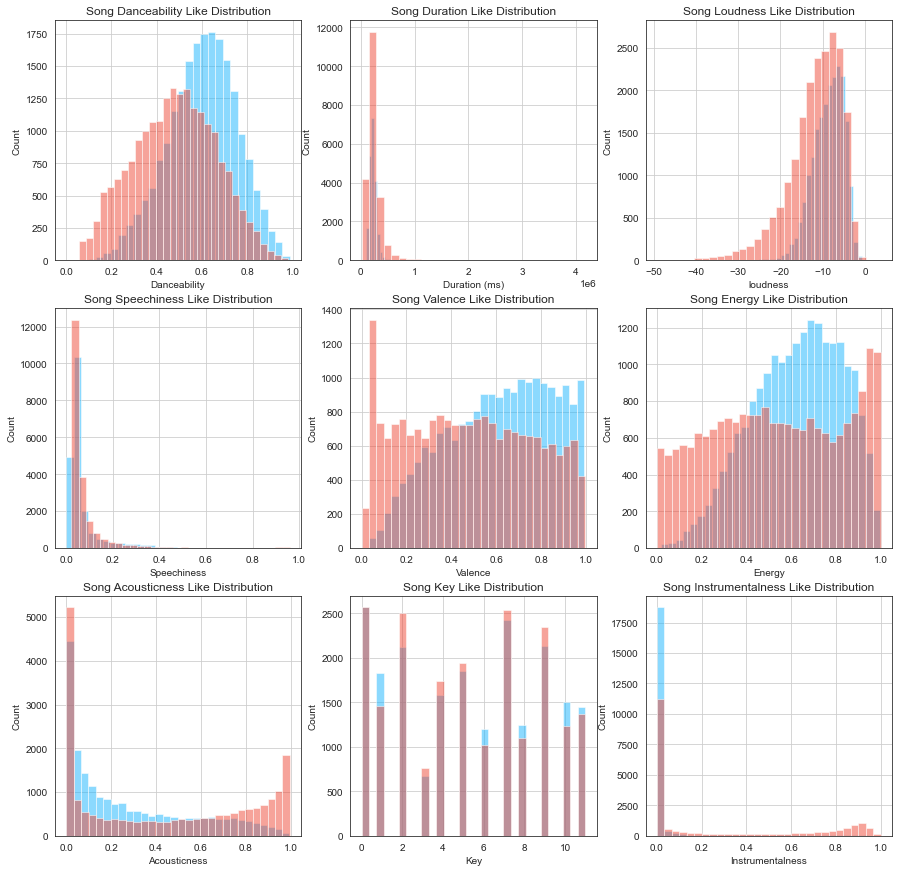

In [124]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel("Danceability")
ax3.set_ylabel("Count")
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

# Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel("Duration (ms)")
ax5.set_ylabel("Count")
ax5.set_title("Song Duration Like Distribution")
pos_duration.hist(alpha=0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

# Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel("loudness")
ax7.set_ylabel("Count")
ax7.set_title("Song Loudness Like Distribution")
pos_loudness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel("Speechiness")
ax9.set_ylabel("Count")
ax9.set_title("Song Speechiness Like Distribution")
pos_speechiness.hist(alpha=0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel("Valence")
ax11.set_ylabel("Count")
ax11.set_title("Song Valence Like Distribution")
pos_valence.hist(alpha=0.5, bins=30)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel("Energy")
ax13.set_ylabel("Count")
ax13.set_title("Song Energy Like Distribution")
pos_energy.hist(alpha=0.5, bins=30)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Acousticness
ax15 = fig2.add_subplot(337)
ax15.set_xlabel("Acousticness")
ax15.set_ylabel("Count")
ax15.set_title("Song Acousticness Like Distribution")
pos_acousticness.hist(alpha=0.5, bins=30)
ax16 = fig2.add_subplot(337)
neg_acousticness.hist(alpha=0.5, bins=30)

# Key
ax17 = fig2.add_subplot(338)
ax17.set_xlabel("Key")
ax17.set_ylabel("Count")
ax17.set_title("Song Key Like Distribution")
pos_key.hist(alpha=0.5, bins=30)
ax18 = fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)

# Instrumentalness
ax19 = fig2.add_subplot(339)
ax19.set_xlabel("Instrumentalness")
ax19.set_ylabel("Count")
ax19.set_title("Song Instrumentalness Like Distribution")
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)


<b> Lets Compare Danceability Hits/Flops in all the 00s,10s,60s,70s,80s,90s datasets </b>

In [41]:
pos_danceability_df_00s = df_00s[df_00s['target'] == 1]['danceability']
neg_danceability_df_00s= df_00s[df_00s['target'] == 0]['danceability']

pos_danceability_df_10s = df_10s[df_10s['target'] == 1]['danceability']
neg_danceability_df_10s= df_10s[df_10s['target'] == 0]['danceability']

pos_danceability_df_60s = df_60s[df_60s['target'] == 1]['danceability']
neg_danceability_df_60s= df_60s[df_60s['target'] == 0]['danceability']

pos_danceability_df_70s = df_70s[df_70s['target'] == 1]['danceability']
neg_danceability_df_70s= df_70s[df_70s['target'] == 0]['danceability']

pos_danceability_df_80s = df_80s[df_80s['target'] == 1]['danceability']
neg_danceability_df_80s= df_80s[df_80s['target'] == 0]['danceability']

pos_danceability_df_90s = df_90s[df_90s['target'] == 1]['danceability']
neg_danceability_df_90s= df_90s[df_90s['target'] == 0]['danceability']

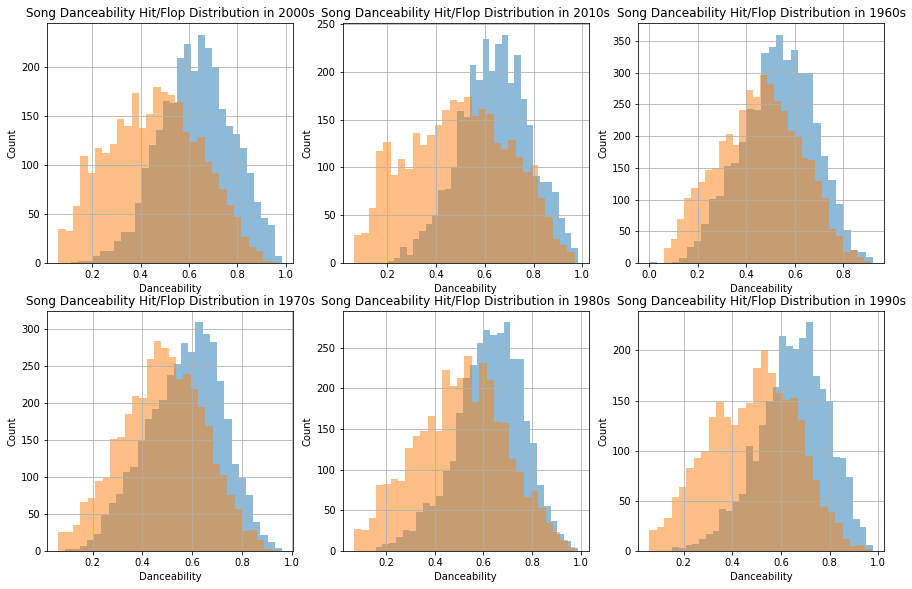

In [42]:
fig3 = plt.figure(figsize=(15, 15))

# Danceability in the 2000's
ax21 = fig3.add_subplot(331)
ax21.set_xlabel("Danceability")
ax21.set_ylabel("Count")
ax21.set_title("Song Danceability Hit/Flop Distribution in 2000s")
pos_danceability_df_00s.hist(alpha=0.5, bins=30,label='positive')
ax22 = fig3.add_subplot(331)
neg_danceability_df_00s.hist(alpha=0.5, bins=30,label='negative')


# Danceability in the 2010's
ax23 = fig3.add_subplot(332)
ax23.set_xlabel("Danceability")
ax23.set_ylabel("Count")
ax23.set_title("Song Danceability Hit/Flop Distribution in 2010s")
pos_danceability_df_10s.hist(alpha=0.5, bins=30)
ax24 = fig3.add_subplot(332)
neg_danceability_df_10s.hist(alpha=0.5, bins=30)

# Danceability in the 1960's
ax25 = fig3.add_subplot(333)
ax25.set_xlabel("Danceability")
ax25.set_ylabel("Count")
ax25.set_title("Song Danceability Hit/Flop Distribution in 1960s")
pos_danceability_df_60s.hist(alpha=0.5, bins=30)
ax26 = fig3.add_subplot(333)
neg_danceability_df_60s.hist(alpha=0.5, bins=30)

# Danceability in the 1970's
ax27 = fig3.add_subplot(334)
ax27.set_xlabel("Danceability")
ax27.set_ylabel("Count")
ax27.set_title("Song Danceability Hit/Flop Distribution in 1970s")
pos_danceability_df_70s.hist(alpha=0.5, bins=30)
ax28 = fig3.add_subplot(334)
neg_danceability_df_70s.hist(alpha=0.5, bins=30)

# Danceability in the 1980's
ax29 = fig3.add_subplot(335)
ax29.set_xlabel("Danceability")
ax29.set_ylabel("Count")
ax29.set_title("Song Danceability Hit/Flop Distribution in 1980s")
pos_danceability_df_80s.hist(alpha=0.5, bins=30)
ax30 = fig3.add_subplot(335)
neg_danceability_df_80s.hist(alpha=0.5, bins=30)

# Danceability in the 1990's
ax31 = fig3.add_subplot(336)
ax31.set_xlabel("Danceability")
ax31.set_ylabel("Count")
ax31.set_title("Song Danceability Hit/Flop Distribution in 1990s")
pos_danceability_df_90s.hist(alpha=0.5, bins=30)
ax32 = fig3.add_subplot(336)
neg_danceability_df_90s.hist(alpha=0.5, bins=30) 

Irrespective of there year of track release, People always prefer to listen more danceable songs, than the other songs,
Blue representation shows the songs get liked from the people,and brown shows dislike(or flop)

<b>Lets Compare 'Tempo' 'Hits/Flops' in all the 00s,10s,60s,70s,80s,90s datasets</b>

In [25]:
pos_tempo_df_00s = df_00s[df_00s['target'] == 1]['tempo']
neg_tempo_df_00s= df_00s[df_00s['target'] == 0]['tempo']

pos_tempo_df_10s = df_10s[df_10s['target'] == 1]['tempo']
neg_tempo_df_10s= df_10s[df_10s['target'] == 0]['tempo']

pos_tempo_df_60s = df_60s[df_60s['target'] == 1]['tempo']
neg_tempo_df_60s= df_60s[df_60s['target'] == 0]['tempo']

pos_tempo_df_70s = df_70s[df_70s['target'] == 1]['tempo']
neg_tempo_df_70s= df_70s[df_70s['target'] == 0]['tempo']

pos_tempo_df_80s = df_80s[df_80s['target'] == 1]['tempo']
neg_tempo_df_80s= df_80s[df_80s['target'] == 0]['tempo']

pos_tempo_df_90s = df_90s[df_90s['target'] == 1]['tempo']
neg_tempo_df_90s= df_90s[df_90s['target'] == 0]['tempo']

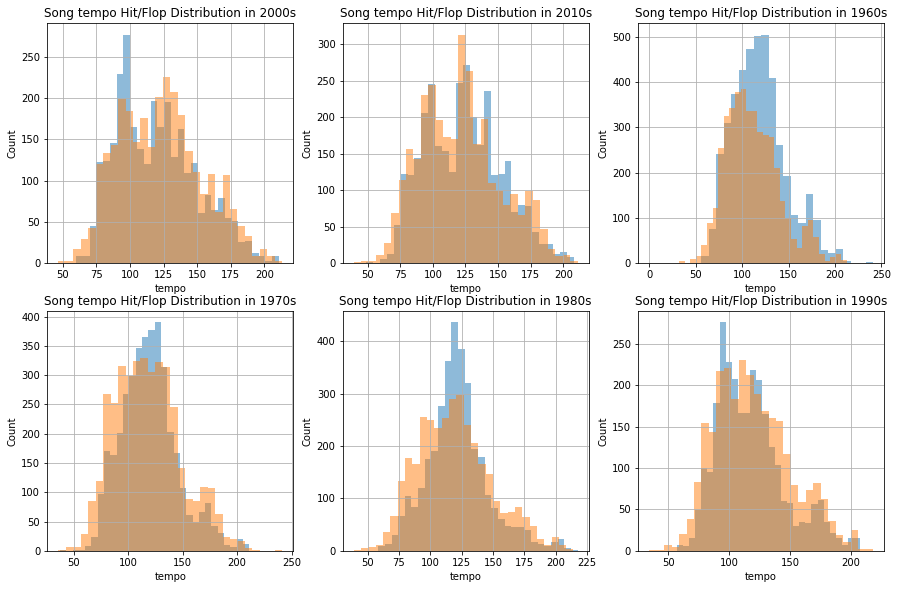

In [26]:
fig3 = plt.figure(figsize=(15, 15))

# Tempo in the 2000's
ax21 = fig3.add_subplot(331)
ax21.set_xlabel("tempo")
ax21.set_ylabel("Count")
ax21.set_title("Song tempo Hit/Flop Distribution in 2000s")
pos_tempo_df_00s.hist(alpha=0.5, bins=30,label='positive')
ax22 = fig3.add_subplot(331)
neg_tempo_df_00s.hist(alpha=0.5, bins=30,label='negative')


# Tempo in the 2010's
ax23 = fig3.add_subplot(332)
ax23.set_xlabel("tempo")
ax23.set_ylabel("Count")
ax23.set_title("Song tempo Hit/Flop Distribution in 2010s")
pos_tempo_df_10s.hist(alpha=0.5, bins=30)
ax24 = fig3.add_subplot(332)
neg_tempo_df_10s.hist(alpha=0.5, bins=30)

# Tempo in the 1960's
ax25 = fig3.add_subplot(333)
ax25.set_xlabel("tempo")
ax25.set_ylabel("Count")
ax25.set_title("Song tempo Hit/Flop Distribution in 1960s")
pos_tempo_df_60s.hist(alpha=0.5, bins=30)
ax26 = fig3.add_subplot(333)
neg_tempo_df_60s.hist(alpha=0.5, bins=30)

# Tempo in the 1970's
ax27 = fig3.add_subplot(334)
ax27.set_xlabel("tempo")
ax27.set_ylabel("Count")
ax27.set_title("Song tempo Hit/Flop Distribution in 1970s")
pos_tempo_df_70s.hist(alpha=0.5, bins=30)
ax28 = fig3.add_subplot(334)
neg_tempo_df_70s.hist(alpha=0.5, bins=30)

# Tempo in the 1980's
ax29 = fig3.add_subplot(335)
ax29.set_xlabel("tempo")
ax29.set_ylabel("Count")
ax29.set_title("Song tempo Hit/Flop Distribution in 1980s")
pos_tempo_df_80s.hist(alpha=0.5, bins=30)
ax30 = fig3.add_subplot(335)
neg_tempo_df_80s.hist(alpha=0.5, bins=30)

# Tempo in the 1990's
ax31 = fig3.add_subplot(336)
ax31.set_xlabel("tempo")
ax31.set_ylabel("Count")
ax31.set_title("Song tempo Hit/Flop Distribution in 1990s")
pos_tempo_df_90s.hist(alpha=0.5, bins=30)
ax32 = fig3.add_subplot(336)
neg_tempo_df_90s.hist(alpha=0.5, bins=30) 

<b>Lets Compare 'Energy' Hits/Flops in all the 00s,10s,60s,70s,80s,90s datasets</b>

In [44]:
pos_energy_df_00s = df_00s[df_00s['target'] == 1]['energy']
neg_energy_df_00s= df_00s[df_00s['target'] == 0]['energy']

pos_energy_df_10s = df_10s[df_10s['target'] == 1]['energy']
neg_energy_df_10s= df_10s[df_10s['target'] == 0]['energy']

pos_energy_df_60s = df_60s[df_60s['target'] == 1]['energy']
neg_energy_df_60s= df_60s[df_60s['target'] == 0]['energy']

pos_energy_df_70s = df_70s[df_70s['target'] == 1]['energy']
neg_energy_df_70s= df_70s[df_70s['target'] == 0]['energy']

pos_energy_df_80s = df_80s[df_80s['target'] == 1]['energy']
neg_energy_df_80s= df_80s[df_80s['target'] == 0]['energy']

pos_energy_df_90s = df_90s[df_90s['target'] == 1]['energy']
neg_energy_df_90s= df_90s[df_90s['target'] == 0]['energy']

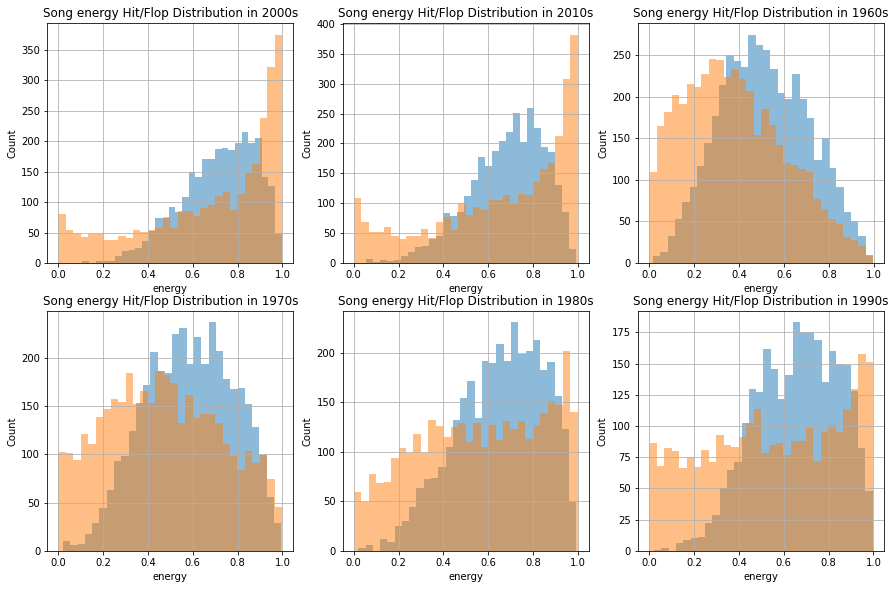

In [45]:
fig3 = plt.figure(figsize=(15, 15))

# Energy in the 2000's
ax21 = fig3.add_subplot(331)
ax21.set_xlabel("energy")
ax21.set_ylabel("Count")
ax21.set_title("Song energy Hit/Flop Distribution in 2000s")
pos_energy_df_00s.hist(alpha=0.5, bins=30,label='positive')
ax22 = fig3.add_subplot(331)
neg_energy_df_00s.hist(alpha=0.5, bins=30,label='negative')


# Energy in the 2010's
ax23 = fig3.add_subplot(332)
ax23.set_xlabel("energy")
ax23.set_ylabel("Count")
ax23.set_title("Song energy Hit/Flop Distribution in 2010s")
pos_energy_df_10s.hist(alpha=0.5, bins=30)
ax24 = fig3.add_subplot(332)
neg_energy_df_10s.hist(alpha=0.5, bins=30)

# Energy in the 1960's
ax25 = fig3.add_subplot(333)
ax25.set_xlabel("energy")
ax25.set_ylabel("Count")
ax25.set_title("Song energy Hit/Flop Distribution in 1960s")
pos_energy_df_60s.hist(alpha=0.5, bins=30)
ax26 = fig3.add_subplot(333)
neg_energy_df_60s.hist(alpha=0.5, bins=30)

# Energy in the 1970's
ax27 = fig3.add_subplot(334)
ax27.set_xlabel("energy")
ax27.set_ylabel("Count")
ax27.set_title("Song energy Hit/Flop Distribution in 1970s")
pos_energy_df_70s.hist(alpha=0.5, bins=30)
ax28 = fig3.add_subplot(334)
neg_energy_df_70s.hist(alpha=0.5, bins=30)

# Energy in the 1980's
ax29 = fig3.add_subplot(335)
ax29.set_xlabel("energy")
ax29.set_ylabel("Count")
ax29.set_title("Song energy Hit/Flop Distribution in 1980s")
pos_energy_df_80s.hist(alpha=0.5, bins=30)
ax30 = fig3.add_subplot(335)
neg_energy_df_80s.hist(alpha=0.5, bins=30)

# Energy in the 1990's
ax31 = fig3.add_subplot(336)
ax31.set_xlabel("energy")
ax31.set_ylabel("Count")
ax31.set_title("Song energy Hit/Flop Distribution in 1990s")
pos_energy_df_90s.hist(alpha=0.5, bins=30)
ax32 = fig3.add_subplot(336)
neg_energy_df_90s.hist(alpha=0.5, bins=30) 

Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. <br>
We can see very interesting pattern here, In the 90s energetic songs likes more than in the 2000s and in 2010s

<b>Lets Compare 'Speechiness' Hits/Flops in all the 00s,10s,60s,70s,80s,90s datasets

In [46]:
pos_speechiness_df_00s = df_00s[df_00s['target'] == 1]['speechiness']
neg_speechiness_df_00s= df_00s[df_00s['target'] == 0]['speechiness']

pos_speechiness_df_10s = df_10s[df_10s['target'] == 1]['speechiness']
neg_speechiness_df_10s= df_10s[df_10s['target'] == 0]['speechiness']

pos_speechiness_df_60s = df_60s[df_60s['target'] == 1]['speechiness']
neg_speechiness_df_60s= df_60s[df_60s['target'] == 0]['speechiness']

pos_speechiness_df_70s = df_70s[df_70s['target'] == 1]['speechiness']
neg_speechiness_df_70s= df_70s[df_70s['target'] == 0]['speechiness']

pos_speechiness_df_80s = df_80s[df_80s['target'] == 1]['speechiness']
neg_speechiness_df_80s= df_80s[df_80s['target'] == 0]['speechiness']

pos_speechiness_df_90s = df_90s[df_90s['target'] == 1]['speechiness']
neg_speechiness_df_90s= df_90s[df_90s['target'] == 0]['speechiness']

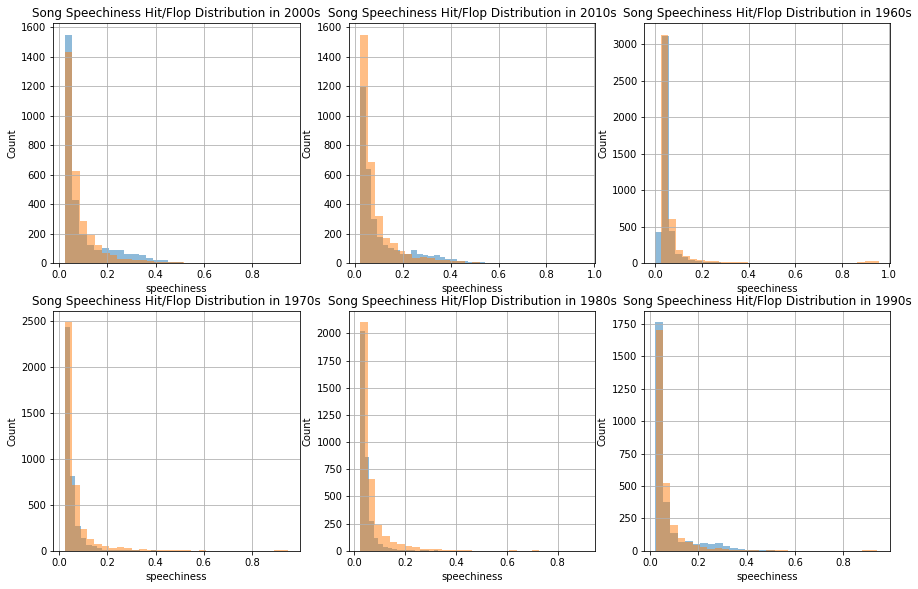

In [47]:
fig3 = plt.figure(figsize=(15, 15))

# Speechiness in the 2000's
ax21 = fig3.add_subplot(331)
ax21.set_xlabel("speechiness")
ax21.set_ylabel("Count")
ax21.set_title("Song Speechiness Hit/Flop Distribution in 2000s")
pos_speechiness_df_00s.hist(alpha=0.5, bins=30,label='positive')
ax22 = fig3.add_subplot(331)
neg_speechiness_df_00s.hist(alpha=0.5, bins=30,label='negative')

# Speechiness in the 2010's
ax23 = fig3.add_subplot(332)
ax23.set_xlabel("speechiness")
ax23.set_ylabel("Count")
ax23.set_title("Song Speechiness Hit/Flop Distribution in 2010s")
pos_speechiness_df_10s.hist(alpha=0.5, bins=30)
ax24 = fig3.add_subplot(332)
neg_speechiness_df_10s.hist(alpha=0.5, bins=30)

# Speechiness in the 1960's
ax25 = fig3.add_subplot(333)
ax25.set_xlabel("speechiness")
ax25.set_ylabel("Count")
ax25.set_title("Song Speechiness Hit/Flop Distribution in 1960s")
pos_speechiness_df_60s.hist(alpha=0.5, bins=30)
ax26 = fig3.add_subplot(333)
neg_speechiness_df_60s.hist(alpha=0.5, bins=30)

# Speechiness in the 1970's
ax27 = fig3.add_subplot(334)
ax27.set_xlabel("speechiness")
ax27.set_ylabel("Count")
ax27.set_title("Song Speechiness Hit/Flop Distribution in 1970s")
pos_speechiness_df_70s.hist(alpha=0.5, bins=30)
ax28 = fig3.add_subplot(334)
neg_speechiness_df_70s.hist(alpha=0.5, bins=30)

# Speechiness in the 1980's
ax29 = fig3.add_subplot(335)
ax29.set_xlabel("speechiness")
ax29.set_ylabel("Count")
ax29.set_title("Song Speechiness Hit/Flop Distribution in 1980s")
pos_speechiness_df_80s.hist(alpha=0.5, bins=30)
ax30 = fig3.add_subplot(335)
neg_speechiness_df_80s.hist(alpha=0.5, bins=30)

# Speechiness in the 1990's
ax31 = fig3.add_subplot(336)
ax31.set_xlabel("speechiness")
ax31.set_ylabel("Count")
ax31.set_title("Song Speechiness Hit/Flop Distribution in 1990s")
pos_speechiness_df_90s.hist(alpha=0.5, bins=30)
ax32 = fig3.add_subplot(336)
neg_speechiness_df_90s.hist(alpha=0.5, bins=30) 

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

<b>Lets Compare 'instrumentalness' Hits/Flops in all the 00s,10s,60s,70s,80s,90s datasets</b>

In [48]:
pos_instrumentalness_df_00s = df_00s[df_00s['target'] == 1]['instrumentalness']
neg_instrumentalness_df_00s= df_00s[df_00s['target'] == 0]['instrumentalness']

pos_instrumentalness_df_10s = df_10s[df_10s['target'] == 1]['instrumentalness']
neg_instrumentalness_df_10s= df_10s[df_10s['target'] == 0]['instrumentalness']

pos_instrumentalness_df_60s = df_60s[df_60s['target'] == 1]['instrumentalness']
neg_instrumentalness_df_60s= df_60s[df_60s['target'] == 0]['instrumentalness']

pos_instrumentalness_df_70s = df_70s[df_70s['target'] == 1]['instrumentalness']
neg_instrumentalness_df_70s= df_70s[df_70s['target'] == 0]['instrumentalness']

pos_instrumentalness_df_80s = df_80s[df_80s['target'] == 1]['instrumentalness']
neg_instrumentalness_df_80s= df_80s[df_80s['target'] == 0]['instrumentalness']

pos_instrumentalness_df_90s = df_90s[df_90s['target'] == 1]['instrumentalness']
neg_instrumentalness_df_90s= df_90s[df_90s['target'] == 0]['instrumentalness']

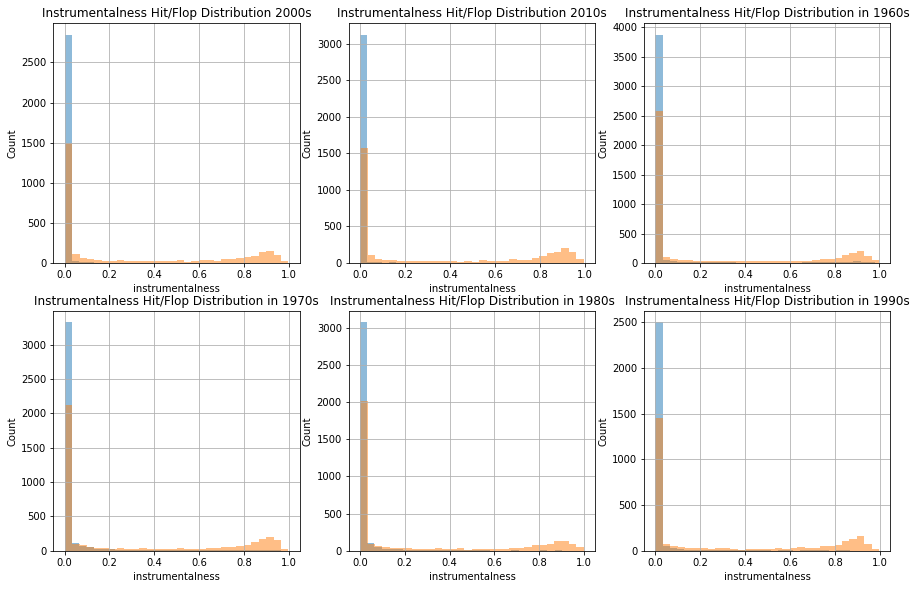

In [49]:
fig3 = plt.figure(figsize=(15, 15))

# Instrumentalness in the 2000's
ax21 = fig3.add_subplot(331)
ax21.set_xlabel("instrumentalness")
ax21.set_ylabel("Count")
ax21.set_title("Instrumentalness Hit/Flop Distribution 2000s")
pos_instrumentalness_df_00s.hist(alpha=0.5, bins=30,label='positive')
ax22 = fig3.add_subplot(331)
neg_instrumentalness_df_00s.hist(alpha=0.5, bins=30,label='negative')

# Instrumentalness in the 2010's
ax23 = fig3.add_subplot(332)
ax23.set_xlabel("instrumentalness")
ax23.set_ylabel("Count")
ax23.set_title("Instrumentalness Hit/Flop Distribution 2010s")
pos_instrumentalness_df_10s.hist(alpha=0.5, bins=30)
ax24 = fig3.add_subplot(332)
neg_instrumentalness_df_10s.hist(alpha=0.5, bins=30)

#Instrumentalness in the 1960's
ax25 = fig3.add_subplot(333)
ax25.set_xlabel("instrumentalness")
ax25.set_ylabel("Count")
ax25.set_title("Instrumentalness Hit/Flop Distribution in 1960s")
pos_instrumentalness_df_60s.hist(alpha=0.5, bins=30)
ax26 = fig3.add_subplot(333)
neg_instrumentalness_df_60s.hist(alpha=0.5, bins=30)

# Instrumentalness in the 1970's
ax27 = fig3.add_subplot(334)
ax27.set_xlabel("instrumentalness")
ax27.set_ylabel("Count")
ax27.set_title("Instrumentalness Hit/Flop Distribution in 1970s")
pos_instrumentalness_df_70s.hist(alpha=0.5, bins=30)
ax28 = fig3.add_subplot(334)
neg_instrumentalness_df_70s.hist(alpha=0.5, bins=30)

# Instrumentalness in the 1980's
ax29 = fig3.add_subplot(335)
ax29.set_xlabel("instrumentalness")
ax29.set_ylabel("Count")
ax29.set_title("Instrumentalness Hit/Flop Distribution in 1980s")
pos_instrumentalness_df_80s.hist(alpha=0.5, bins=30)
ax30 = fig3.add_subplot(335)
neg_instrumentalness_df_80s.hist(alpha=0.5, bins=30)

# Instrumentalness in the 1990's
ax31 = fig3.add_subplot(336)
ax31.set_xlabel("instrumentalness")
ax31.set_ylabel("Count")
ax31.set_title("Instrumentalness Hit/Flop Distribution in 1990s")
pos_instrumentalness_df_90s.hist(alpha=0.5, bins=30)
ax32 = fig3.add_subplot(336)
neg_instrumentalness_df_90s.hist(alpha=0.5, bins=30) 

 Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

<b>Lets Compare 'liveness' Hits/Flops in all the 00s,10s,60s,70s,80s,90s datasets</b>

In [57]:
pos_liveness_df_00s = df_00s[df_00s['target'] == 1]['liveness']
neg_liveness_df_00s= df_00s[df_00s['target'] == 0]['liveness']

pos_liveness_df_10s = df_10s[df_10s['target'] == 1]['liveness']
neg_liveness_df_10s= df_10s[df_10s['target'] == 0]['liveness']

pos_liveness_df_60s = df_60s[df_60s['target'] == 1]['liveness']
neg_liveness_df_60s= df_60s[df_60s['target'] == 0]['liveness']

pos_liveness_df_70s = df_70s[df_70s['target'] == 1]['liveness']
neg_liveness_df_70s= df_70s[df_70s['target'] == 0]['liveness']

pos_liveness_df_80s = df_80s[df_80s['target'] == 1]['liveness']
neg_liveness_df_80s= df_80s[df_80s['target'] == 0]['liveness']

pos_liveness_df_90s = df_90s[df_90s['target'] == 1]['liveness']
neg_liveness_df_90s= df_90s[df_90s['target'] == 0]['liveness']

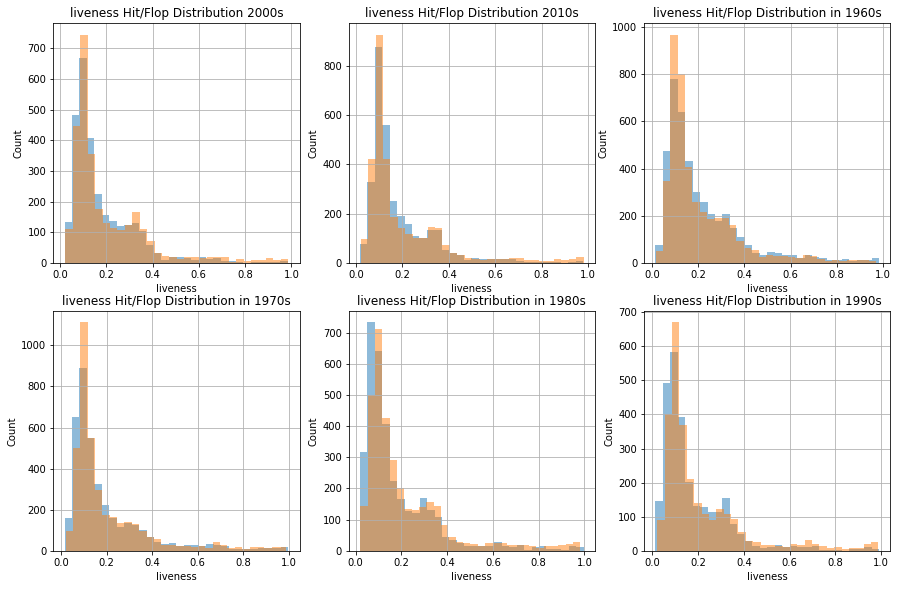

In [58]:
fig3 = plt.figure(figsize=(15, 15))

#liveness in the 2000's
ax21 = fig3.add_subplot(331)
ax21.set_xlabel("liveness")
ax21.set_ylabel("Count")
ax21.set_title("liveness Hit/Flop Distribution 2000s")
pos_liveness_df_00s.hist(alpha=0.5, bins=30,label='positive')
ax22 = fig3.add_subplot(331)
neg_liveness_df_00s.hist(alpha=0.5, bins=30,label='negative')

# liveness in the 2010's
ax23 = fig3.add_subplot(332)
ax23.set_xlabel("liveness")
ax23.set_ylabel("Count")
ax23.set_title("liveness Hit/Flop Distribution 2010s")
pos_liveness_df_10s.hist(alpha=0.5, bins=30)
ax24 = fig3.add_subplot(332)
neg_liveness_df_10s.hist(alpha=0.5, bins=30)

#liveness in the 1960's
ax25 = fig3.add_subplot(333)
ax25.set_xlabel("liveness")
ax25.set_ylabel("Count")
ax25.set_title("liveness Hit/Flop Distribution in 1960s")
pos_liveness_df_60s.hist(alpha=0.5, bins=30)
ax26 = fig3.add_subplot(333)
neg_liveness_df_60s.hist(alpha=0.5, bins=30)

# liveness in the 1970's
ax27 = fig3.add_subplot(334)
ax27.set_xlabel("liveness")
ax27.set_ylabel("Count")
ax27.set_title("liveness Hit/Flop Distribution in 1970s")
pos_liveness_df_70s.hist(alpha=0.5, bins=30)
ax28 = fig3.add_subplot(334)
neg_liveness_df_70s.hist(alpha=0.5, bins=30)

# liveness in the 1980's
ax29 = fig3.add_subplot(335)
ax29.set_xlabel("liveness")
ax29.set_ylabel("Count")
ax29.set_title("liveness Hit/Flop Distribution in 1980s")
pos_liveness_df_80s.hist(alpha=0.5, bins=30)
ax30 = fig3.add_subplot(335)
neg_liveness_df_80s.hist(alpha=0.5, bins=30)

# liveness in the 1990's
ax31 = fig3.add_subplot(336)
ax31.set_xlabel("liveness")
ax31.set_ylabel("Count")
ax31.set_title("liveness Hit/Flop Distribution in 1990s")
pos_liveness_df_90s.hist(alpha=0.5, bins=30)
ax32 = fig3.add_subplot(336)
neg_liveness_df_90s.hist(alpha=0.5, bins=30) 

A value above 0.8 provides strong likelihood that the track is live(performed live).

<b> Lets observe the original spotify dataset with 'Line plots' for easy understanding </b>

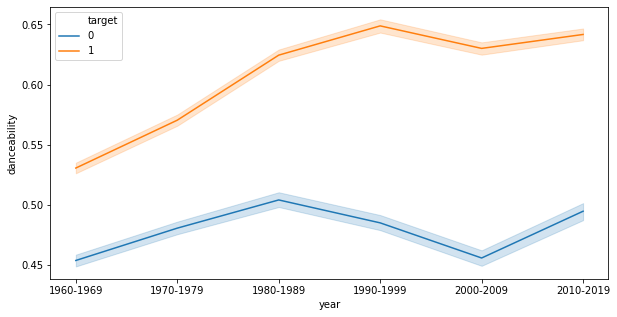

In [70]:
# Danceability over the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='danceability',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs

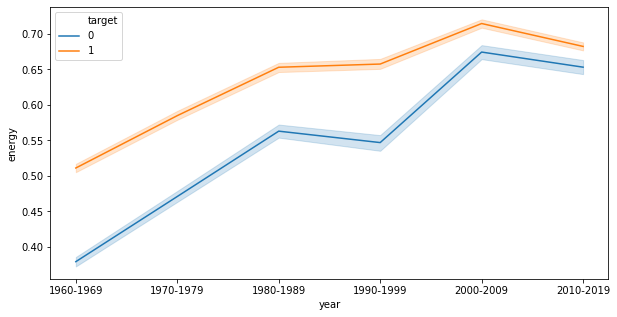

In [72]:
# Energy over the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='energy',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs

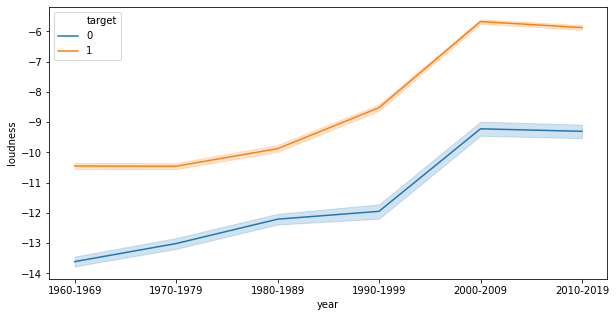

In [73]:
# loudness over the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='loudness',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs

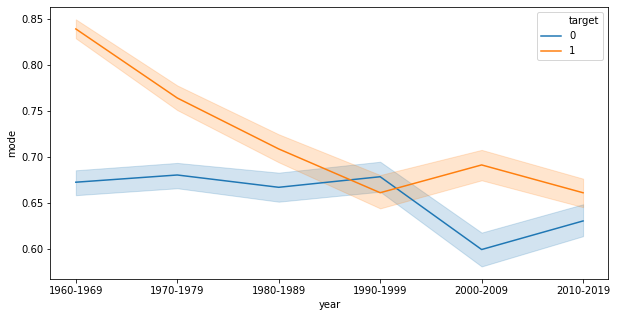

In [74]:
# mode over the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='mode',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs

Mode indicates the modality (major or minor) of a track, Major is represented by 1 and minor is 0.

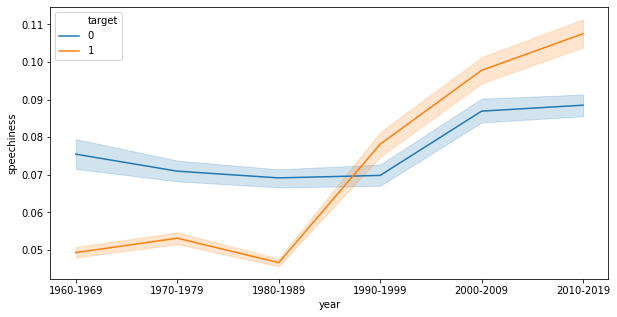

In [75]:
# speechiness over the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='speechiness',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs 

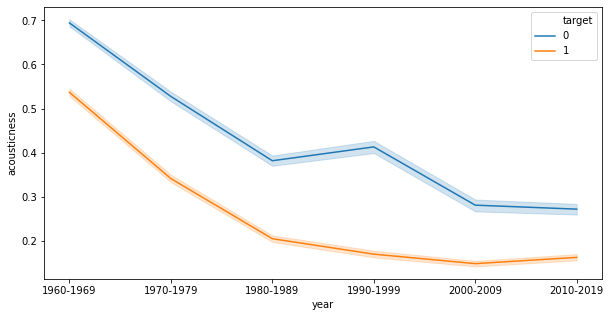

In [76]:
# acousticness over the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='acousticness',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs 

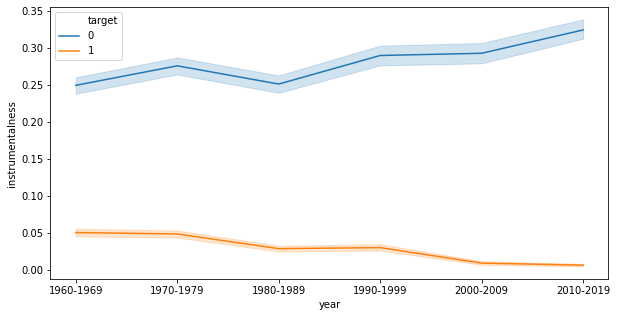

In [77]:
# instrumentalness over the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='instrumentalness',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs 

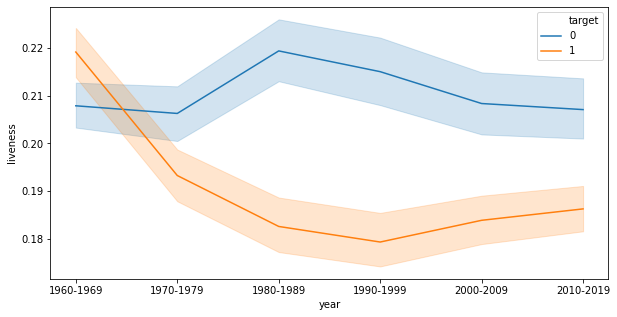

In [79]:
# livenessover the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='liveness',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs 

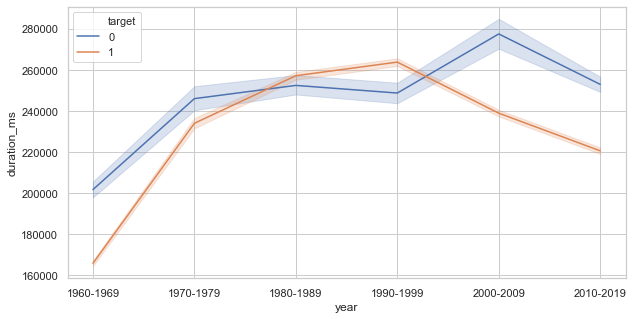

In [94]:
# duration_ms the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='duration_ms',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs 

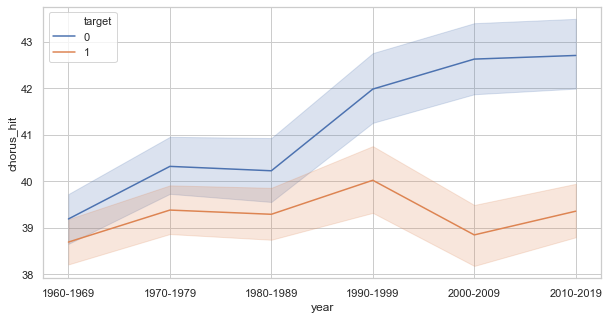

In [95]:
# chorus_hit the years
plt.figure(figsize=size) # size=(10,5)
sns.lineplot(x='year',y='chorus_hit',hue='target',data=spotify)
plt.show() # O-flop(disliked) songs, 1-Hit(liked) songs 

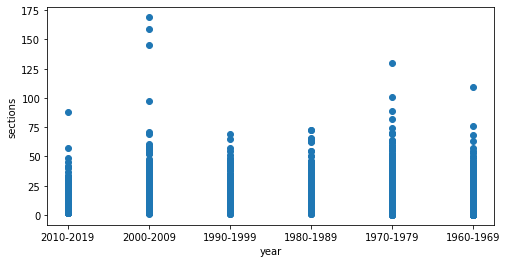

In [88]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(spotify['year'],spotify['sections'])
ax.set_xlabel('year')
ax.set_ylabel('sections')
plt.show()

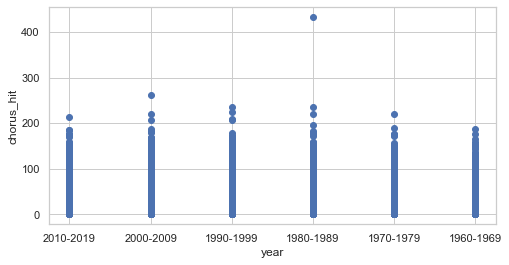

In [91]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(spotify['year'],spotify['chorus_hit'])
ax.set_xlabel('year')
ax.set_ylabel('chorus_hit')
plt.show() 

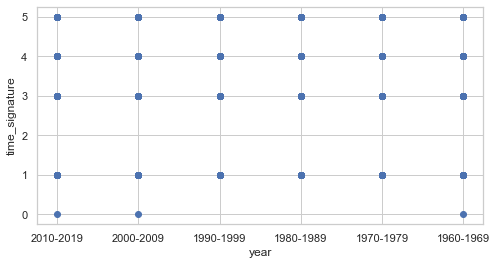

In [92]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(spotify['year'],spotify['time_signature'])
ax.set_xlabel('year')
ax.set_ylabel('time_signature')
plt.show() 

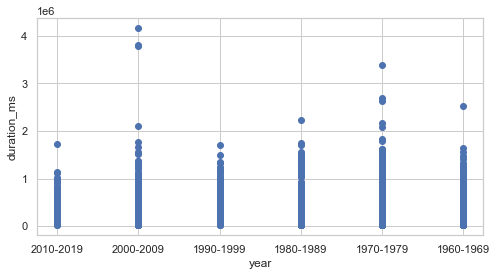

In [93]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(spotify['year'],spotify['duration_ms'])
ax.set_xlabel('year')
ax.set_ylabel('duration_ms')
plt.show() 

Text(0.5, 0, 'Year')

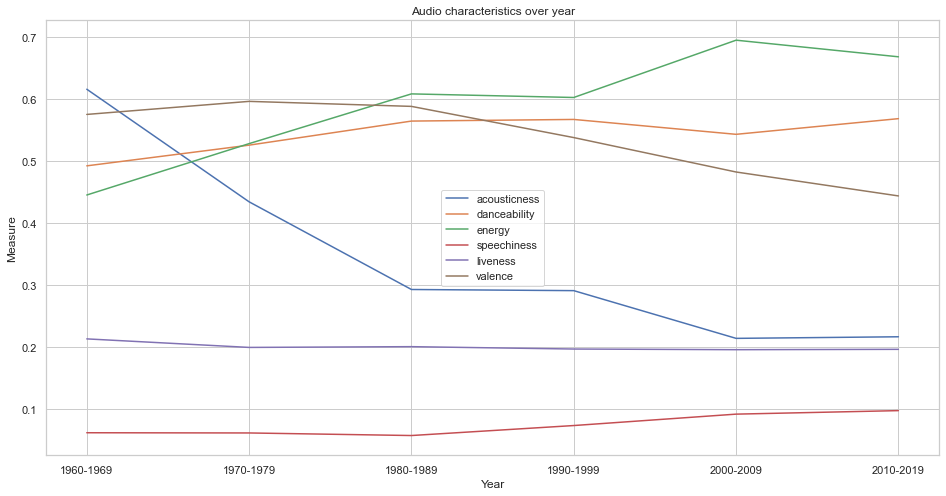

In [98]:
# Audio characteristics over the years.
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = spotify.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

<Figure size 1152x576 with 0 Axes>

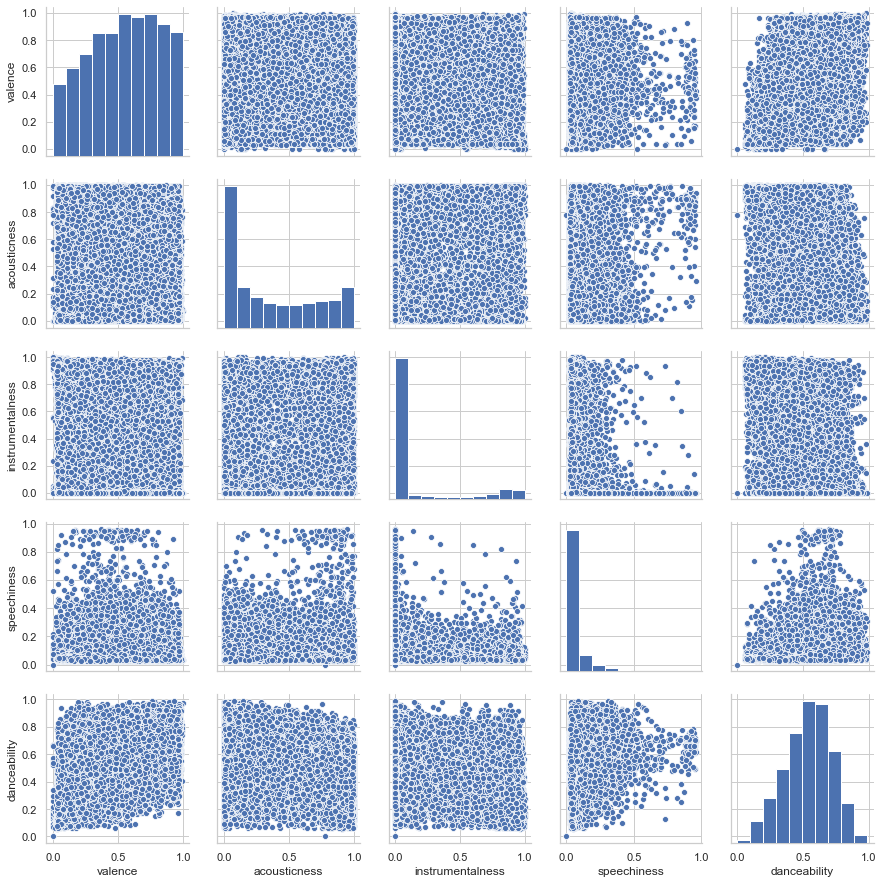

In [100]:
# Lets Visualuse pair plots 
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(spotify[cols], height = 2.5 )
plt.show()

The dataset contains songs from as far back as 1960. We can get an overview how the characteristics of song change, <br>over a 50-year-period.

In [29]:
year_avg = spotify[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()
year_avg.head()

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
0,1960-1969,0.615557,0.492169,0.445210,0.149919,0.213531,115.125274,0.574963,-12.029726,0.062402
1,1970-1979,0.434240,0.525500,0.527952,0.162163,0.199794,119.009447,0.595993,-11.734270,0.062053
2,1980-1989,0.293067,0.564258,0.608037,0.139863,0.201009,120.649572,0.587922,-11.041894,0.057906
3,1990-1999,0.291220,0.566893,0.602246,0.159886,0.197202,118.840424,0.537685,-10.235112,0.073996
4,2000-2009,0.214374,0.542931,0.694511,0.150917,0.196141,121.613018,0.482262,-7.449258,0.092360


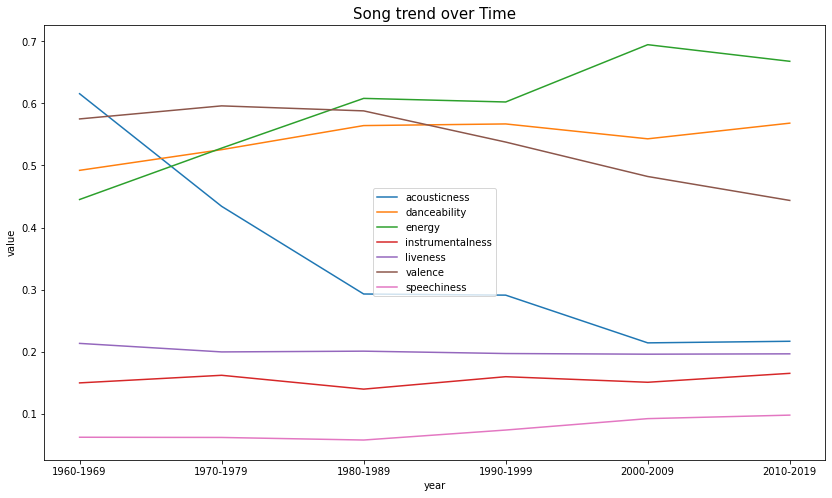

In [37]:
#Create a line plot
plt.figure(figsize=(14,8))
plt.title("Song trend over Time", fontdict={"fontsize":15})
lines = ["acousticness","danceability","energy","instrumentalness","liveness","valence","speechiness"]
for line in lines:
    ax = sns.lineplot(x='year', y=line,data = year_avg)
    
plt.ylabel("value")
plt.legend(lines)

### Artists with Most Songs

let's analyze which artists have the most songs over this fifty-year-period

In [40]:
spotify['artist'].nunique()

11904

In [41]:
# Top 10 artists with most songs
spotify["artist"].value_counts()[:10]

Traditional             207
Harry Belafonte         140
P. Susheela             130
Ennio Morricone         128
Jerry Goldsmith         124
Vicente Fernández       116
Antônio Carlos Jobim    109
Gilberto Gil             88
Frank Zappa              80
Raimon                   79
Name: artist, dtype: int64

In [48]:
artist_list = spotify.artist.value_counts().index[:10]
spotify_artist = spotify[spotify.artist.isin(artist_list)][["artist","year"]].\
groupby(["artist","year"]).size().reset_index(name = "song_count")
spotify_artist.head()

,artist,year,song_count
0,Antônio Carlos Jobim,1960-1969,73
1,Antônio Carlos Jobim,1970-1979,19
2,Antônio Carlos Jobim,1980-1989,8
3,Antônio Carlos Jobim,1990-1999,9
4,Ennio Morricone,1960-1969,97


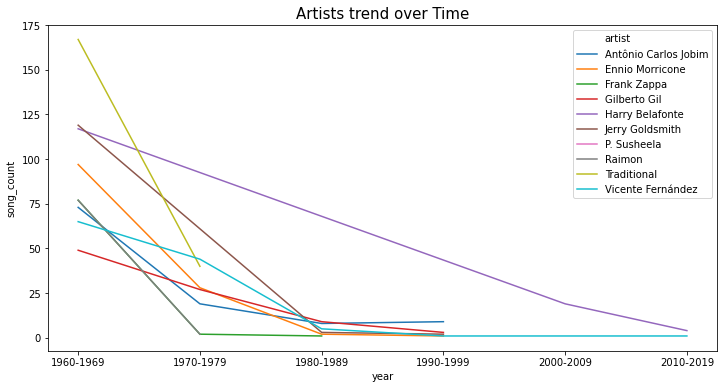

In [53]:
plt.figure(figsize=(12,6))
plt.title("Artists trend over Time", fontdict={"fontsize":15})
sns.lineplot(x="year", y="song_count", hue="artist", data=spotify_artist)

<b>"Vincente Fernandez"</b> & <b>"Harry belafente"</b> these two artsists still has the audience <br> even after the 50 years of time (Eventhough there fame decaying over time period)

Lets Visualize the top 30 Artsists using worldcloud

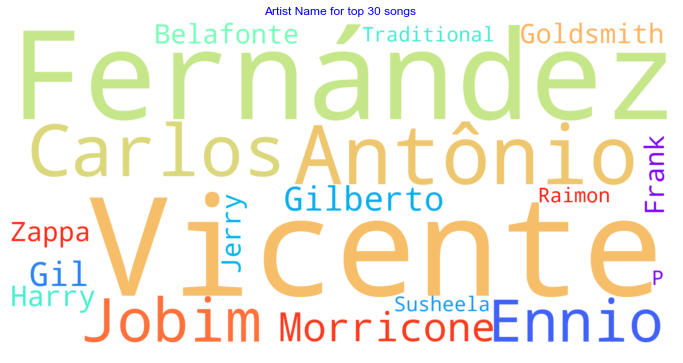

In [57]:
#pip istall wordcloud
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = spotify_artist["artist"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 30 songs ",color='b')
plt.show()

Lets visualize the feature 'Key' 

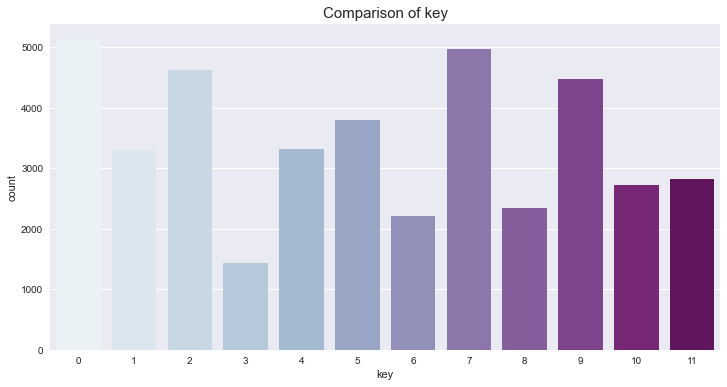

In [62]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('tableau-colorblind10')

sns.countplot(spotify['key'], palette = 'BuPu')
plt.title('Comparison of key', fontweight = 30, fontsize = 15)
plt.xlabel('key')
plt.ylabel('count')
plt.xticks(rotation = 0)
plt.show()

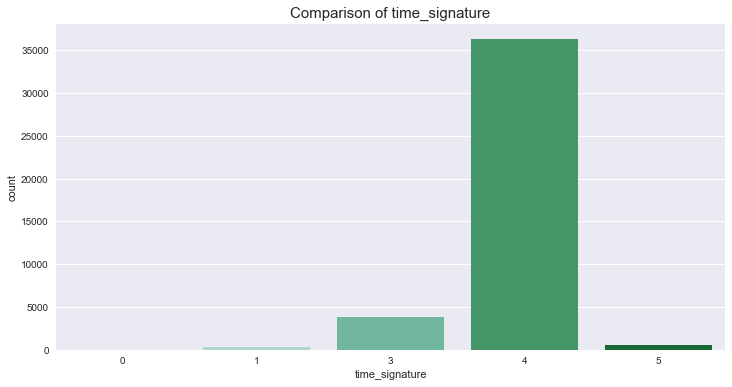

In [64]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('tableau-colorblind10')

sns.countplot(spotify['time_signature'], palette = 'BuGn')
plt.title('Comparison of time_signature', fontweight = 30, fontsize = 15)
plt.xlabel('time_signature')
plt.ylabel('count')
plt.xticks(rotation = 0)
plt.show()

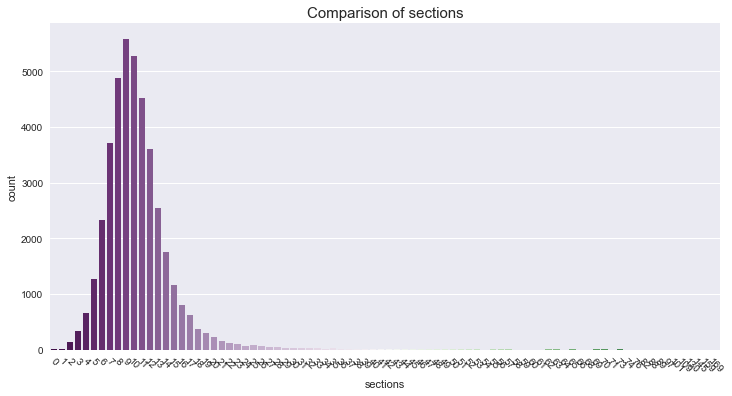

In [68]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('tableau-colorblind10')

sns.countplot(spotify['sections'], palette = 'PRGn')
plt.title('Comparison of sections', fontweight = 30, fontsize = 15)
plt.xlabel('sections')
plt.ylabel('count')
plt.xticks(rotation = -45)
plt.show()

In [39]:
spotify.head(5)

,year,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,2010-2019,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,2010-2019,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,2010-2019,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,2010-2019,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,2010-2019,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


### Correlation

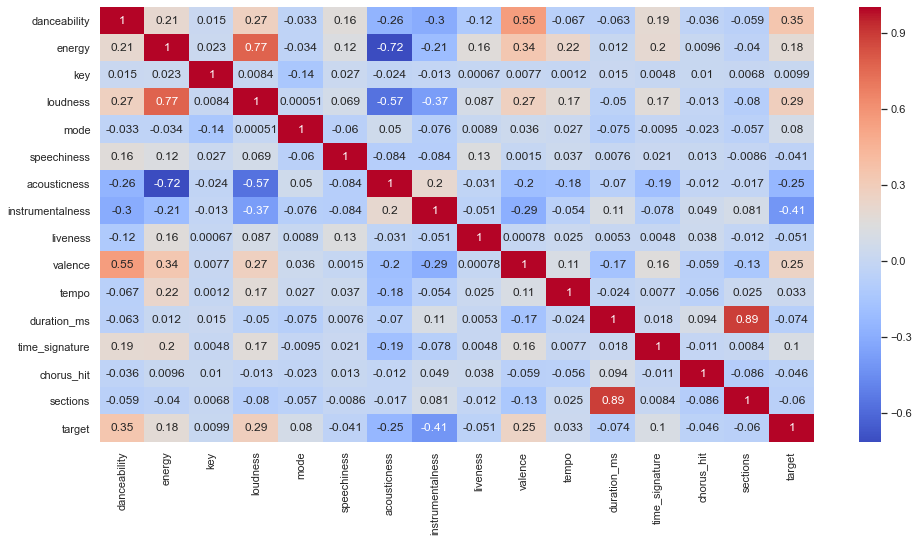

In [89]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = spotify.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

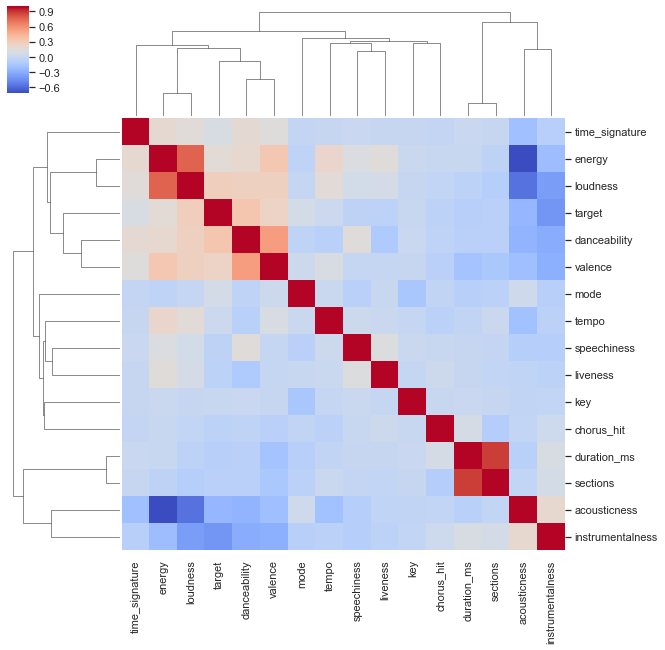

In [90]:
sns.clustermap(corr,cmap="coolwarm")

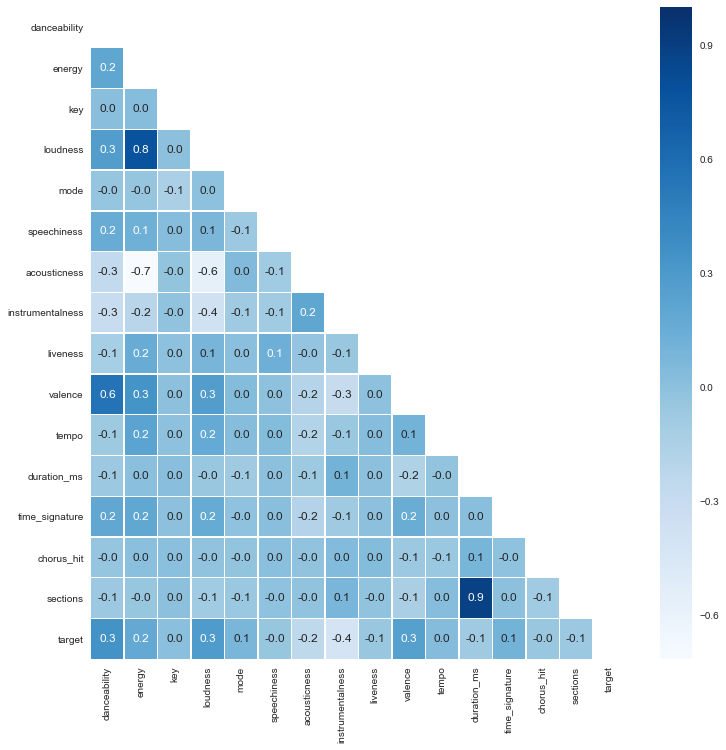

In [80]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(spotify.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(spotify.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

###  Feature selections:

In [17]:
from sklearn.feature_selection import SelectKBest

In [18]:
features_response = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit','sections','target']

In [19]:
spotify_select = spotify[features_response]

In [20]:
spotify_select.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [21]:
spotify_select.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [22]:
X = spotify_select.iloc[:,0:14]  #independent columns
y = spotify_select.iloc[:,-1]    #target column i.e price range

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [24]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.1009353  0.08709514 0.04760359 0.06763449 0.01366462 0.06518858
 0.10780204 0.18521621 0.05384328 0.07810082 0.05528566 0.06937306
 0.01520812 0.0530491 ]


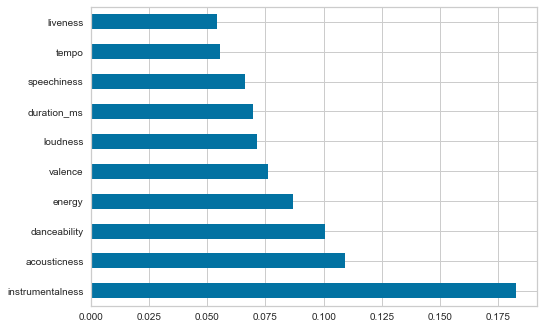

In [143]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [145]:
feat_importances

danceability        0.100720
energy              0.087046
key                 0.047394
loudness            0.071216
mode                0.012513
speechiness         0.066042
acousticness        0.109372
instrumentalness    0.182510
liveness            0.054302
valence             0.075985
tempo               0.055488
duration_ms         0.069523
time_signature      0.015309
chorus_hit          0.052580
dtype: float64

In [25]:
final_feat_select = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','target']

In [26]:
spotify_final_feat = spotify[final_feat_select]

In [27]:
spotify_final_feat.head(5)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,target
0,0.741,0.626,-4.826,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,1
1,0.447,0.247,-14.661,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,0
2,0.550,0.415,-6.557,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,1
3,0.502,0.648,-5.698,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,0
4,0.807,0.887,-3.892,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,1


In [28]:
spotify_final_feat.shape

(41106, 11)

# 2. Model building

### 2.1 Logistic Regression

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(spotify_final_feat[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']],spotify_final_feat.target,train_size=0.8)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_predicted = model.predict(X_test)

In [34]:
model.predict_proba(X_test)

array([[0.50733306, 0.49266694],
       [0.51572836, 0.48427164],
       [0.52444432, 0.47555568],
       ...,
       [0.51182278, 0.48817722],
       [0.51537397, 0.48462603],
       [0.51657542, 0.48342458]])

In [35]:
model.score(X_test,y_test)

0.5071758696180978

<b>Importance of Feature Scaling</b>

In [36]:
normalized_df=(spotify_final_feat-spotify_final_feat.min())/(spotify_final_feat.max()-spotify_final_feat.min())

In [37]:
normalized_df.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,target
0,0.750000,0.625906,0.838293,0.092292,0.020080,0.000,0.070791,0.708835,0.447468,0.041714,1.0
1,0.452429,0.246811,0.652716,0.036042,0.874498,0.814,0.082759,0.251004,0.644052,0.038919,0.0
2,0.556680,0.414853,0.805631,0.054167,0.161647,0.000,0.096349,0.275100,0.712712,0.045798,1.0


In [50]:
normalized_df.shape

(41106, 11)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']],normalized_df.target,train_size=0.8)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_predicted = model.predict(X_test)

In [42]:
model.predict_proba(X_test)

array([[0.97347361, 0.02652639],
       [0.45026445, 0.54973555],
       [0.59986158, 0.40013842],
       ...,
       [0.40325426, 0.59674574],
       [0.3534588 , 0.6465412 ],
       [0.22435031, 0.77564969]])

In [ ]:
from sklearn.metrics import accuracy_score

In [48]:
#Training accuracy
accuracy_score(y_train, model.predict(X_train))

0.7254287799537769

In [47]:
#Testing accuracy
#accuracy_score(y_test,y_predicted)

0.720384334711749

In [43]:
#Testing accuracy
model.score(X_test,y_test)

0.720384334711749

#### 2.3 Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [83]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [84]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 1., ..., 0., 1., 1.])

In [85]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [86]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7055460958404282


In [100]:
final_feat_select[0:10]

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [102]:
#import pydotplus
#from io import StringIO
#from sklearn.tree import DecisionTreeClassifier, export_graphviz

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True,feature_names =final_feat_select[0:10],class_names=['0','1'])#
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('spotify.png')
#Image(graph.create_png())

#### 2.4 Random Forest

In [150]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [151]:
clf=RandomForestClassifier(n_estimators=100)

In [152]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
y_pred=clf.predict(X_test)

In [154]:
#Training accuracy
accuracy_score(y_train, clf.predict(X_train))

0.999300571706605

In [155]:
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.7824130381902213


https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

### 2.3 Deep Learning - SequentialNeuralNet

In [61]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [69]:
model = keras.Sequential([
        keras.layers.Dense(128, activation = 'relu'), #Hidden layer(2)
        keras.layers.Dense(2, activation = 'softmax') #Output layer(3)
        #output = activation(dot(input, kernel) + bias)
])

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
model.fit(X_train.values,y_train.values,epochs=20) # we pass the data, labels and epochs and watch the magic!

Train on 32884 samples
Epoch 1/20
32884/32884 [==============================] - 2s 76us/sample - loss: 0.4875 - acc: 0.7603
Epoch 2/20
32884/32884 [==============================] - 2s 58us/sample - loss: 0.4866 - acc: 0.7620
Epoch 3/20
32884/32884 [==============================] - 2s 56us/sample - loss: 0.4846 - acc: 0.7634
Epoch 4/20
32884/32884 [==============================] - 2s 58us/sample - loss: 0.4845 - acc: 0.7619
Epoch 5/20
32884/32884 [==============================] - 2s 54us/sample - loss: 0.4827 - acc: 0.7659
Epoch 6/20
32884/32884 [==============================] - 2s 54us/sample - loss: 0.4818 - acc: 0.7660
Epoch 7/20
32884/32884 [==============================] - ETA: 0s - loss: 0.4809 - acc: 0.764 - 2s 53us/sample - loss: 0.4813 - acc: 0.7644
Epoch 8/20
32884/32884 [==============================] - 2s 53us/sample - loss: 0.4804 - acc: 0.7660
Epoch 9/20
32884/32884 [==============================] - 2s 54us/sample - loss: 0.4797 - acc: 0.7670
Epoch 10/20
32884/328

In [73]:
test_loss, test_acc = model.evaluate(X_test.values, y_test.values, verbose=1) 

print('Test accuracy:', test_acc)

8222/8222 [==============================] - 0s 31us/sample - loss: 0.5020 - acc: 0.7514
Test accuracy: 0.7513987


In [75]:
predictions = model.predict(X_test.values)
predictions

array([[0.99456453, 0.00543548],
       [0.48114955, 0.5188504 ],
       [0.28777468, 0.7122254 ],
       ...,
       [0.70744735, 0.29255265],
       [0.45441502, 0.5455849 ],
       [0.10649644, 0.89350355]], dtype=float32)

### Extracting the model

In [165]:
import joblib
joblib.dump(clf, "spotify_1.pkl")

['spotify_1.pkl']